# Introduction to Data Science with Python 
## General Assembly
## Natural Language Processing (NLP)

Make sure you have installed nltk and downloaded the following copora:

* punkt
* gutenberg



## Lab Part 1

#### Tokenization

What:  Separate text into units such as sentences or words

Why:   Gives structure to previously unstructured text

Notes: Relatively easy with English language text, not easy with some languages


"corpus" = collection of documents

"corpora" = plural form of corpus


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.metrics
import nltk
%matplotlib inline

In [2]:
# Import the NLTK library, and use ntlk.corpus.gutenberg.fileids() to
# find the filenames for Jane Austen's Emma and Lewis Carrol's Alice in 
# Wonderland

nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [3]:
# Break these novels up into sentences. Put these sentence lists into
# a list so that you can use it later

In [4]:
#split austen-emma.txt
#split carroll-alice.txt

emma_aslist = nltk.sent_tokenize(nltk.corpus.gutenberg.raw('austen-emma.txt'))
alice_aslist = nltk.sent_tokenize(nltk.corpus.gutenberg.raw('carroll-alice.txt'))


In [5]:
# Count the number of sentences in each novel.

print 'Number of sentences in Emma:', len(emma_aslist)
print 'Number of sentences in Alice:', len(alice_aslist)

Number of sentences in Emma: 7493
Number of sentences in Alice: 1625


In [6]:
# Break each sentence up into words. You will end up with a 
# list of lists of words for Emma and another one for Alice in
# Wonderland

emma_list_of_words_per_sent = []
alice_list_of_words_per_sent = []  

for sent in emma_aslist:
    words = [x for x in nltk.word_tokenize(sent) if x not in ['.','?']]
    emma_list_of_words_per_sent.append(words)
    
for sent2 in alice_aslist:
    words2 = [x2 for x2 in nltk.word_tokenize(sent2) if x2 not in ['.','?']]
    alice_list_of_words_per_sent.append(words2)
    
alice_list_of_words_per_sent == emma_list_of_words_per_sent

False

In [7]:
# Count the number of words in each sentence

emma_wc_per_sent = [len(x) for x in emma_list_of_words_per_sent]
alice_wc_per_sent = [len(x) for x in alice_list_of_words_per_sent]

print 'Avg. words per sentence in Emma: ', sum(emma_wc_per_sent) / len(emma_aslist)
print 'Avg. words per sentence in Alice: ', sum(alice_wc_per_sent) / len(alice_aslist)

Avg. words per sentence in Emma:  24
Avg. words per sentence in Alice:  19


In [8]:
# Which novel has more average words per sentence?

#Emma!

# Given their target audience, is this what you would expect?

#Yes

In [9]:
# Create a flat list (i.e. not a list of lists) of words in
# the two novels

emma_words_used = set()
alice_words_used = set()
    
for i in emma_list_of_words_per_sent:
    for t in i:
        emma_words_used.add(t)

for a in alice_list_of_words_per_sent:
    for l in a:
        alice_words_used.add(l)
        
emma_words_used == alice_words_used

False

In [10]:
# For each novel, construct a set of all the distinct words used


In [11]:
# Calculate the lexical diversity of each novel (distinct words / word count)

emma_lexdiv = float(len(emma_words_used)) / float(sum(emma_wc_per_sent))
alice_lexdiv = float(len(alice_words_used)) / float(sum(alice_wc_per_sent))

print 'Lexical Div. for Emma: ', emma_lexdiv
print 'Lexical Div. for Alice: ', alice_lexdiv

Lexical Div. for Emma:  0.0458264075757
Lexical Div. for Alice:  0.0991815267793


In [12]:
emma_list_of_words_per_sent[0][1]

u'Emma'

In [13]:
# (Optional, only for the very keen)
# Repeat the above analysis for all the Gutenberg samples
# Create a dataframe with the 

#=======================

column_names = ['file_name',
                'book_name', 
                'year',
                'lexical_diversity', 
                'avg_sentence_length',
                'target_audience']

#target_audience_children # Can you use logistic regression to predict the audience, based on the content?

#=========================

#Part 0

df = pd.DataFrame(columns=column_names)

list_of_gut_books = ['austen-emma.txt',
                    'austen-persuasion.txt',
                    'austen-sense.txt',
                    'bible-kjv.txt',
                    'blake-poems.txt',
                    'bryant-stories.txt',
                    'burgess-busterbrown.txt',
                    'carroll-alice.txt',
                    'chesterton-ball.txt',
                    'chesterton-brown.txt',
                    'chesterton-thursday.txt',
                    'edgeworth-parents.txt',
                    'melville-moby_dick.txt',
                    'milton-paradise.txt',
                    'shakespeare-caesar.txt',
                    'shakespeare-hamlet.txt',
                    'shakespeare-macbeth.txt',
                    'whitman-leaves.txt']

book_name_list = []                       
year_list = []                            
lexical_diversity_list = []          
avg_sentence_length_list = []        
#target_audience_list = []

for book in list_of_gut_books:
        
    #Part 1
    book_aslist = nltk.sent_tokenize(nltk.corpus.gutenberg.raw(book))
    year_list.append(book_aslist[0])

    #Part 2
    book_list_of_words_per_sent = []
    for sent in book_aslist:
        words = [x for x in nltk.word_tokenize(sent) if x not in ['.','?']]
        book_list_of_words_per_sent.append(words)
    
    book_name_list.append(book_list_of_words_per_sent[0][1])
        
    #Part 3
    book_wc_per_sent = [len(x) for x in book_list_of_words_per_sent]
    avg_sentence_length = float(sum(book_wc_per_sent)) / float(len(book_aslist))
    avg_sentence_length_list.append(avg_sentence_length)
    
    #Part 4
    book_words_used = set()
    for i in book_list_of_words_per_sent:
        for t in i:
            book_words_used.add(t)

    #Part 5
    book_lexdiv = float(len(book_words_used)) / float(sum(book_wc_per_sent))
    lexical_diversity_list.append(book_lexdiv)

    print 'working...'
    
#Part 6
df.file_name = list_of_gut_books
df.book_name = book_name_list
df.year = year_list
df.lexical_diversity = lexical_diversity_list
df.avg_sentence_length = avg_sentence_length_list
#df.target_audience = target_audience_list

df

working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...


,file_name,book_name,year,lexical_diversity,avg_sentence_length,target_audience
0,austen-emma.txt,Emma,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...,0.045826,24.649273,NaN
1,austen-persuasion.txt,Persuasion,[Persuasion by Jane Austen 1818]\n\n\nChapter ...,0.066186,25.876300,NaN
2,austen-sense.txt,Sense,[Sense and Sensibility by Jane Austen 1811]\n\...,0.051939,28.324436,NaN
3,bible-kjv.txt,The,[The King James Bible]\n\nThe Old Testament of...,0.019830,30.769925,NaN
4,blake-poems.txt,Poems,[Poems by William Blake 1789]\n\n \nSONGS OF I...,0.227964,22.402817,NaN
5,bryant-stories.txt,Stories,[Stories to Tell to Children by Sara Cone Brya...,0.083938,19.658564,NaN
6,burgess-busterbrown.txt,The,[The Adventures of Buster Bear by Thornton W. ...,0.099253,17.644356,NaN
7,carroll-alice.txt,Alice,[Alice's Adventures in Wonderland by Lewis Car...,0.099182,19.774154,NaN
8,chesterton-ball.txt,The,[The Ball and The Cross by G.K. Chesterton 190...,0.097878,20.068988,NaN
9,chesterton-brown.txt,The,[The Wisdom of Father Brown by G. K. Chesterto...,0.104439,22.041487,NaN


In [14]:
df.head()

,file_name,book_name,year,lexical_diversity,avg_sentence_length,target_audience
0,austen-emma.txt,Emma,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...,0.045826,24.649273,NaN
1,austen-persuasion.txt,Persuasion,[Persuasion by Jane Austen 1818]\n\n\nChapter ...,0.066186,25.876300,NaN
2,austen-sense.txt,Sense,[Sense and Sensibility by Jane Austen 1811]\n\...,0.051939,28.324436,NaN
3,bible-kjv.txt,The,[The King James Bible]\n\nThe Old Testament of...,0.019830,30.769925,NaN
4,blake-poems.txt,Poems,[Poems by William Blake 1789]\n\n \nSONGS OF I...,0.227964,22.402817,NaN


In [15]:
df.corr()

,lexical_diversity,avg_sentence_length
lexical_diversity,1.000000,-0.274067
avg_sentence_length,-0.274067,1.000000


In [16]:
x = df[['avg_sentence_length']]
y = df.lexical_diversity

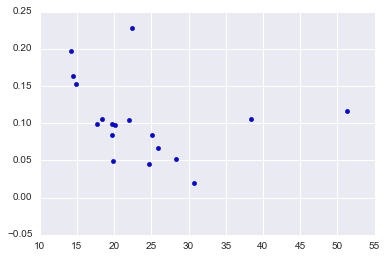

In [17]:
plt.scatter(x,y)

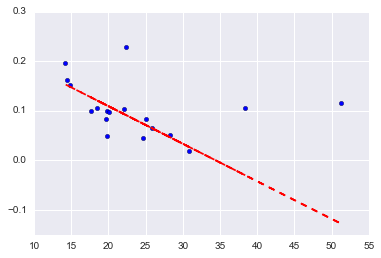

<bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
[-0.00757562]
0.260779546538


In [18]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(x,y)
prediction = ransac.predict(x)

plt.scatter(x,y)
plt.plot(x, prediction, 'r--')
plt.show()

print ransac.estimator_.score
print ransac.estimator_.coef_
print ransac.estimator_.intercept_
 

## Lab Part 2



In [19]:
# Make nltk.Text objects from the two novels

words = nltk.word_tokenize(nltk.corpus.gutenberg.raw('austen-emma.txt'))
emma = nltk.Text(words)

words = nltk.word_tokenize(nltk.corpus.gutenberg.raw('carroll-alice.txt'))
alice = nltk.Text(words)

In [20]:
# Does Jane Austen ever mention the word 'young' in Emma? What about Lewis Carroll?

#emma.concordance('young')
alice.concordance('young')

Displaying 5 of 5 matches:
 'Hold your tongue , Ma ! ' said the young Crab , a little snappishly . 'You 'r
You are old , Father William , ' the young man said , 'And your hair has become
m getting tired of this . I vote the young lady tells us a story . ' 'I 'm afra
 ! ' said the Queen , 'and take this young lady to see the Mock Turtle , and to
ears , but said nothing . 'This here young lady , ' said the Gryphon , 'she wan


In [21]:
# What are the common contexts for these words?
emma.common_contexts(['young'])

accomplished_woman worthy_man the_farmer the_man unexceptionable_man
a_man so_as amiable_man pretty_woman the_are a_man's too_: pert_lawyer
of_person alarming_man ,_cox a_woman too_; the_woman of_men


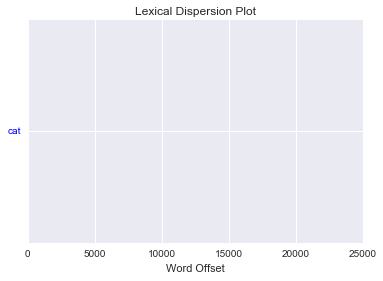

In [42]:
# Where does the word 'cat' appear in Alice and Wonderland?
alice.dispersion_plot(['cat'])

## Lab Part 3

###Stemming
What:  Reduce a word to its base/stem form

Why:   Often makes sense to treat multiple word forms the same way

Notes: Uses a "simple" and fast rule-based approach
       Output can be undesirable for irregular words
       Stemmed words are usually not shown to users (used for analysis/indexing)
       Some search engines treat words with the same stem as synonyms

In [46]:
import nltk.stem.snowball 
import nltk.stem.porter

In [47]:
# Create an English stemmer that uses the Snowball technique

snowball = nltk.stem.snowball.SnowballStemmer('english')

In [25]:
# Stem the following words: charge, charging, charged
print snowball.stem('charge')
print snowball.stem('charging')
print snowball.stem('charged')

charg
charg
charg


In [26]:
# Can you stem "words" with punctuation in them? Or which have no letters?

print snowball.stem('AC&DC')
print snowball.stem('AC.DC')
print snowball.stem('AKB48')
print snowball.stem('A48BK')

ac&dc
ac.dc
akb48
a48bk


In [27]:
# Create a new list of words from the novels by dropping out spurious non-words.
# You might find word_is_just_letters() helpful
import re

emma_words_used_refined = set()

def word_is_just_letters(x):
    for word in x:
        keep = re.search('^[a-zA-Z]+', word)
        if keep is not None:
            emma_words_used_refined.add(word) 

word_is_just_letters(emma_words_used)

print 'all words: ', len(emma_words_used)
print 'all words: ', len(emma_words_used_refined)

all words:  8464
all words:  8194


In [69]:
# Stem all those words

emma_stemmed_words = set()

for w in emma_words_used_refined:
    stem = snowball.stem(w)
    emma_stemmed_words.add(stem)
    
print len(emma_stemmed_words)

4994


In [74]:
# create two collections.Counter objects (one for each novel)
# so that you can easily count word stems. If you give
# the stemmed lists as an argument to constructor, 
# you can use .most_common(25) to get the top 25 tokens

from collections import Counter
import string

In [82]:
#using the most recent group of stemmed words; problem in that all are unique
Counter(emma_stemmed_words).most_common(10)

[(u'inexperi', 1),
 (u'nurseri', 1),
 (u'overcome.', 1),
 (u'pardon', 1),
 (u'knight-errantri', 1),
 (u'resist', 1),
 (u'better.', 1),
 (u'over-salt', 1),
 (u'yellow', 1),
 (u'interchang', 1)]

In [81]:
emma_words_used_refined = []
emma_stemmed_words2 = []

def word_is_just_letters(x):
    for word in x:
        keep = re.search('^[a-zA-Z]+', word)
        if keep is not None:
            emma_words_used_refined.append(word) 

word_is_just_letters(emma)

for w in emma_words_used_refined:
    stem = snowball.stem(w)
    emma_stemmed_words2.append(stem)
    
Counter(emma_stemmed_words2).most_common(10)

[(u'the', 5198),
 (u'to', 5179),
 (u'and', 4875),
 (u'of', 4284),
 (u'i', 3164),
 (u'a', 3124),
 (u'it', 2622),
 (u'her', 2468),
 (u'was', 2396),
 (u'she', 2336)]

###Lemmatization / synset
What:  Derive the canonical form ('lemma') of a word
    
Why:   Can be better than stemming, reduces words to a 'normal' form.
    
Notes: Uses a dictionary-based approach (slower than stemming)
    

In [84]:
nltk.corpus.wordnet.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [72]:
# What synsets does 'dog' belong to?



In [31]:
# Which synset is the one you were thinking of?



In [32]:
# What is its hypernym?



In [33]:
# What about wolves? What synsets does it belong to?



In [34]:
# How closely related are those concepts (dogs and wolves)?



In [35]:
# How closely related are the concepts 'dog' and 'novel'?



## Lab Part 3 Part of speech tagging

Other:
- Analysing data with the Alchemy API
- Further Reading

###Part of Speech Tagging

What:  Determine the part of speech of a word
    
Why:   This can inform other methods and models such as Named Entity Recognition
    
Notes: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [36]:
# Use nltk.pos_tag to parse a sentence


In [37]:
# (Optional for the enthusiastic)
# What verbs did Jane Austen use a lot of?

## Lab Part 4
###Stopword Removal

What:  Remove common words that will likely appear in any text
    
Why:   They don't tell you much about your text

In [38]:
# most of top 25 stemmed tokens are "worthless"
c.most_common(25)

NameError: name 'c' is not defined

In [ ]:
# view the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
sorted(stopwords)

In [ ]:
##################
### Exercise  ####
##################


# Create a variable called stemmed_stops which is the 
# stemmed version of each stopword in stopwords
# Use the stemmer we used up above!

# Then create a list called stemmed_tokens_no_stop that 
# contains only the tokens in stemmed_tokens that aren't in 
# stemmed_stops

# Show the 25 most common stemmed non stop word tokens

## Lab Part 5
###Named Entity Recognition

What:  Automatically extract the names of people, places, organizations, etc.

Why:   Can help you to identify "important" words

Notes: Training NER classifier requires a lot of annotated training data
       Should be trained on data relevant to your task
       Stanford NER classifier is the "gold standard"

In [ ]:
sentence = 'Ian is an instructor for General Assembly'

tokenized = nltk.word_tokenize(sentence)

tokenized

In [ ]:
tagged = nltk.pos_tag(tokenized)

tagged


In [ ]:
chunks = nltk.ne_chunk(tagged)

chunks


In [ ]:
def extract_entities(text):
    entities = []
    # tokenize into sentences
    for sentence in nltk.sent_tokenize(text):
        # tokenize sentences into words
        # add part-of-speech tags
        # use NLTK's NER classifier
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        # parse the results
        entities.extend([chunk for chunk in chunks if hasattr(chunk, 'label')])
    return entities

for entity in extract_entities('Ian is an instructor for General Assembly'):
    print '[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves())

## Lab Part 6
###Term Frequency - Inverse Document Frequency (TF-IDF)

What:  Computes "relative frequency" that a word appears in a document
           compared to its frequency across all documents

Why:   More useful than "term frequency" for identifying "important" words in
           each document (high frequency in that document, low frequency in
           other documents)

Notes: Used for search engine scoring, text summarization, document clustering

How: 
    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
sample = ['Bob likes sports', 'Bob hates sports', 'Bob likes likes trees']

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()


In [ ]:
# Each row represents a sentence
# Each column represents a word
vect.fit_transform(sample).toarray()
vect.get_feature_names()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(sample).toarray()
tfidf.get_feature_names()


In [ ]:
# the IDF of each word
idf = tfidf.idf_
print dict(zip(tfidf.get_feature_names(), idf))


In [ ]:
###############
## Exercise ###
###############


# for each sentence in sample, find the most "interesting 
#words" by ordering their tfidf in ascending order


## Lab Part 7

###LDA - Latent Dirichlet Allocation

What:  Way of automatically discovering topics from sentences

Why:   Much quicker than manually creating and identifying topic clusters

In [ ]:
import lda

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(sentences)


In [ ]:
# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))


In [ ]:
# EXAMPLE: Automatically summarize a document


# corpus of 2000 movie reviews
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(filename) for filename in movie_reviews.fileids()]


In [ ]:
# create document-term matrix
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(reviews)
features = tfidf.get_feature_names()

In [ ]:
import numpy as np


In [ ]:
# find the most and least "interesting" sentences in a randomly selected review
def summarize():
    
    # choose a random movie review    
    review_id = np.random.randint(0, len(reviews))
    review_text = reviews[review_id]

    # we are going to score each sentence in the review for "interesting-ness"
    sent_scores = []
    # tokenize document into sentences
    for sentence in nltk.sent_tokenize(review_text):
        # exclude short sentences
        if len(sentence) > 6:
            score = 0
            token_count = 0
            # tokenize sentence into words
            tokens = nltk.word_tokenize(sentence)
            # compute sentence "score" by summing TFIDF for each word
            for token in tokens:
                if token in features:
                    score += dtm[review_id, features.index(token)]
                    token_count += 1
            # divide score by number of tokens
            sent_scores.append((score / float(token_count + 1), sentence))

    # lowest scoring sentences
    print '\nLOWEST:\n'
    for sent_score in sorted(sent_scores)[:3]:
        print sent_score[1]

    # highest scoring sentences
    print '\nHIGHEST:\n'
    for sent_score in sorted(sent_scores, reverse=True)[:3]:
        print sent_score[1]

# try it out!
summarize()

## Lab Part 8

In [ ]:
# TextBlob Demo: "Simplified Text Processing"
# Installation: pip install textblob
! pip install textblob

In [ ]:
from textblob import TextBlob, Word

In [ ]:
# identify words and noun phrases
blob = TextBlob('Greg and Thamali are instructors for General Assembly')
blob.words
blob.noun_phrases

In [ ]:
# sentiment analysis
blob = TextBlob('I hate this horrible movie. This movie is not very good.')
blob.sentences
blob.sentiment.polarity
[sent.sentiment.polarity for sent in blob.sentences]

In [ ]:
# sentiment subjectivity
TextBlob("I am a cool person").sentiment.subjectivity # Pretty subjective
TextBlob("I am a person").sentiment.subjectivity # Pretty objective
# different scores for essentially the same sentence
print TextBlob('Greg and Thamali are instructors for General Assembly in Sydney').sentiment.subjectivity



In [ ]:
# singularize and pluralize
blob = TextBlob('Put away the dishes.')
[word.singularize() for word in blob.words]

In [ ]:
[word.pluralize() for word in blob.words]


In [ ]:
# spelling correction
blob = TextBlob('15 minuets late')
blob.correct()

In [ ]:
# spellcheck
Word('parot').spellcheck()


In [ ]:
# definitions
Word('bank').define()
Word('bank').define('v')

In [ ]:
# translation and language identification
blob = TextBlob('Welcome to the classroom.')
blob.translate(to='es')
blob = TextBlob('Hola amigos')
blob.detect_language()